In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import iv, kv
from PIL import Image

In [3]:
I = lambda x: iv(0, x)
K = lambda x: kv(0, x)

In [15]:
r1, r2 = 0.5, 1.5
M = 10
m = 1.5
A2 = 2 * pow(M, 2) / (1 + pow(m, 2)) 

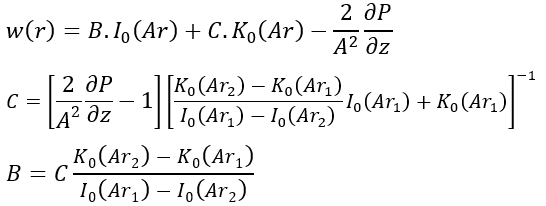

In [2]:
Image.open('newtonian.png')

In [10]:
def c(dpdz):
    A = np.sqrt(A2)
    part_1 = 2 * dpdz / A2 - 1
    part_2 = (K(A * r2) - K(A * r1)) / (I(A * r1) - I(A * r2))
    part_2 = part_2 * I(A * r1) + K(A * r1)
    return part_1 * np.math.pow(part_2, -1)

c = np.vectorize(c)

def b(dpdz):
    A = np.sqrt(A2)
    return c(dpdz) * (K(A * r2) - K(A * r1)) / (I(A * r1) - I(A * r2))

def w(r, dpdz):
    A = np.sqrt(A2)
    return b(dpdz) * I(A * r) + c(dpdz) * K(A * r) - 2 * dpdz / A2

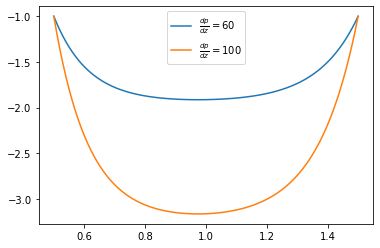

In [18]:
r = np.linspace(r1, r2, 100)
plt.plot(r, w(r, 60), label=r'$\frac{dp}{dz}=60$')
plt.plot(r, w(r, 100), label=r'$\frac{dp}{dz}=100$')
plt.legend()